<h3><b>Exercise set 3 - seaborn-module and data exploration</b></h3>

<h4><b>1. In this exercise, use the 'penguins' dataset from seaborn! </b></h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load example dataset from seaborn
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Basic pairplot to check what data we have

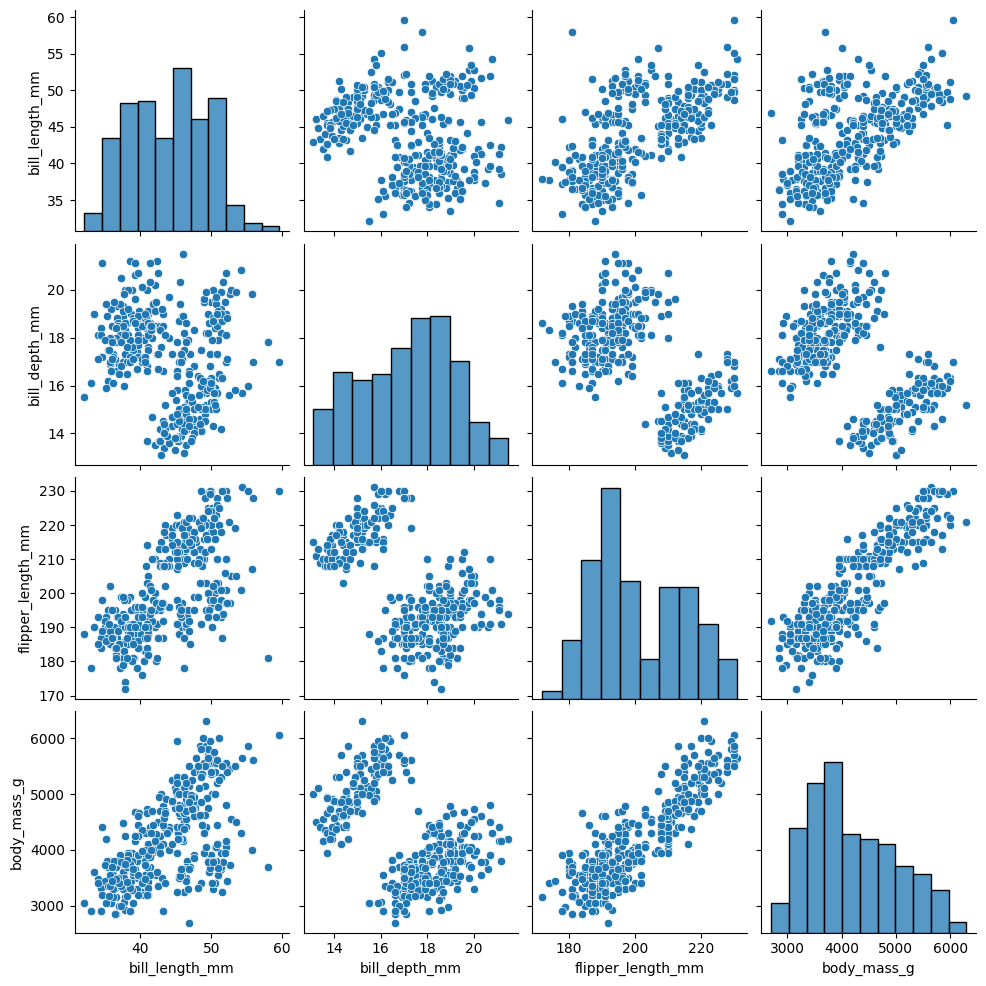

In [3]:
# Check quick with pairplot
# Looks like there is positive correlation in different combinations
# Correlations form strong patterns, there might be different groups that corralate to each other
sns.pairplot(df)

In [4]:
# Check for correlations before removing anything
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [5]:
# Check for NaN values
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# Check for duplicates values
df.duplicated().sum()

0

In [7]:
# Based on small amount of NaN values, we can remove all rows with NaN values
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
# Check for correlations after NaN values are removed
correlations = df.corr(numeric_only=True)
correlations
# Looks like removing NaN values made positive correlations stronger and mixed effect on negative values
# There is strong positive correlations between body mass and flipper length
# Also bill length and flipper length have positive correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


#### More pairploting, with hue to island column

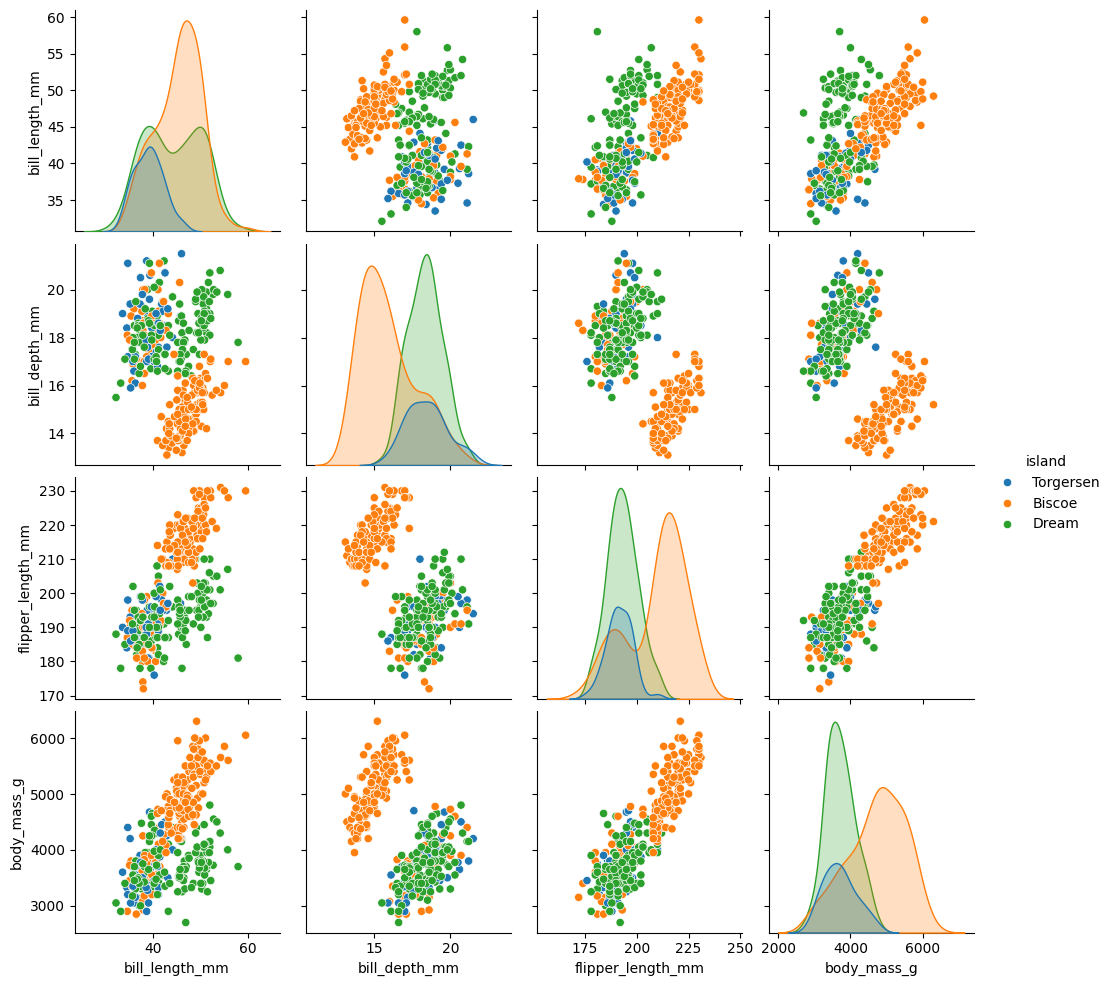

In [9]:
# Use pairplot, hue island
# Looks like almost all value groups form strong packs based on island
# We need more analysis, but looks like different species are living in different islands, especially in Biscoe island
sns.pairplot(df, hue='island')

#### Checking amount of penguins linving on each island

In [10]:
# Check values on penguins on each island
# Torgersen island has least amount of individuals => 47
island = df['island'].value_counts()
island


island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

<Axes: xlabel='island', ylabel='count'>

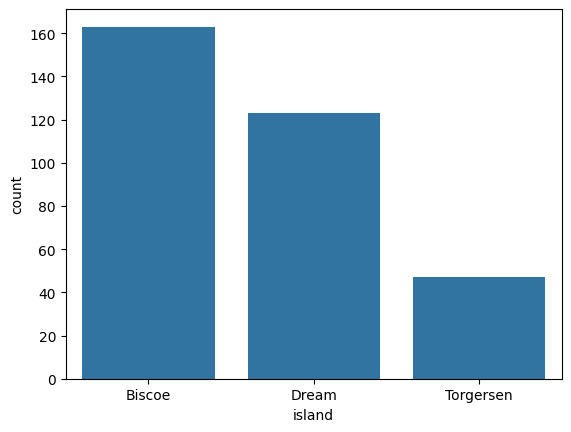

In [11]:
# Visualize island data with barplot
sns.barplot(island)

##### Pairplot with hue on species and sex

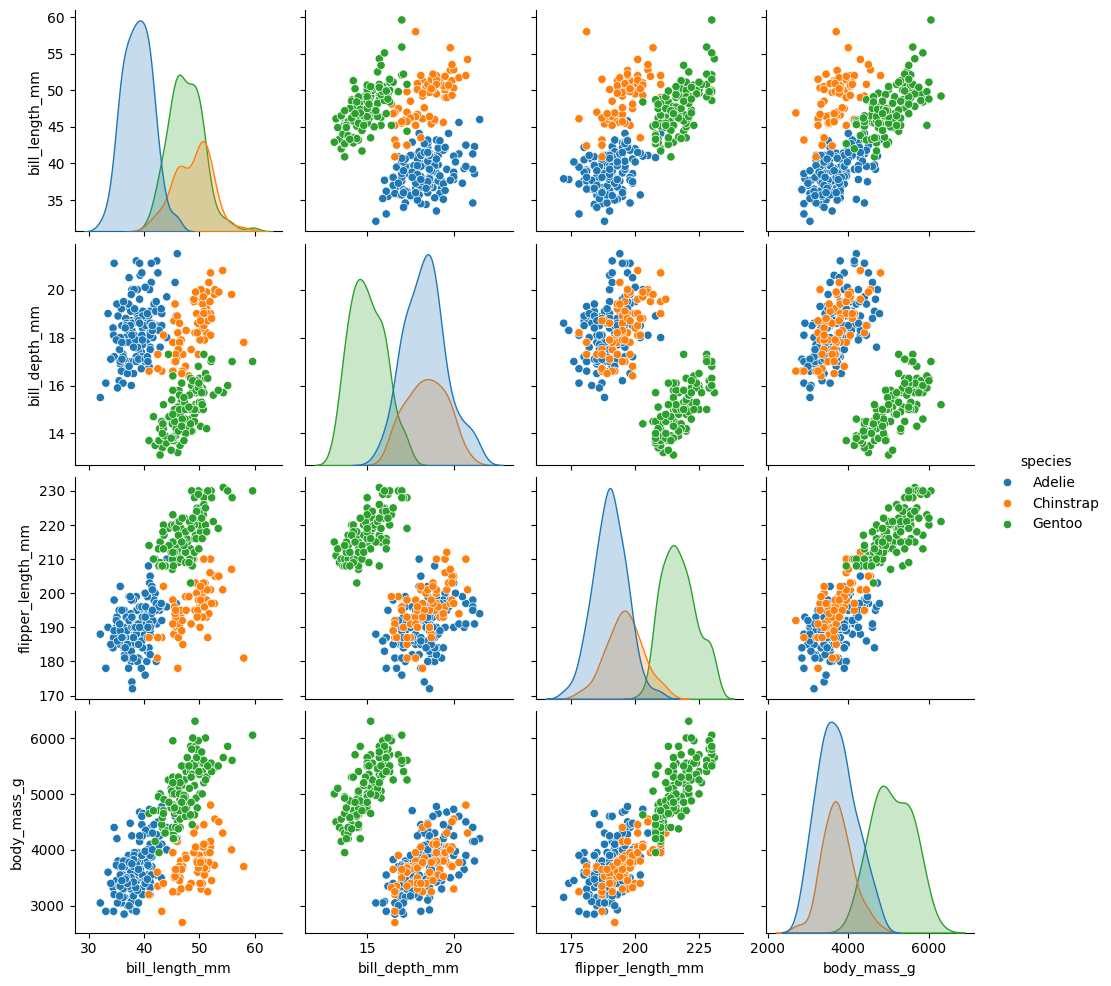

In [12]:
# Pairplot data, use species column as hue
# Looks like distributions are almost identical
# We might say at this point that Gentoo lives in Biscoe island
# Otherwise we need more analysis to make more estimates
sns.pairplot(df, hue='species')

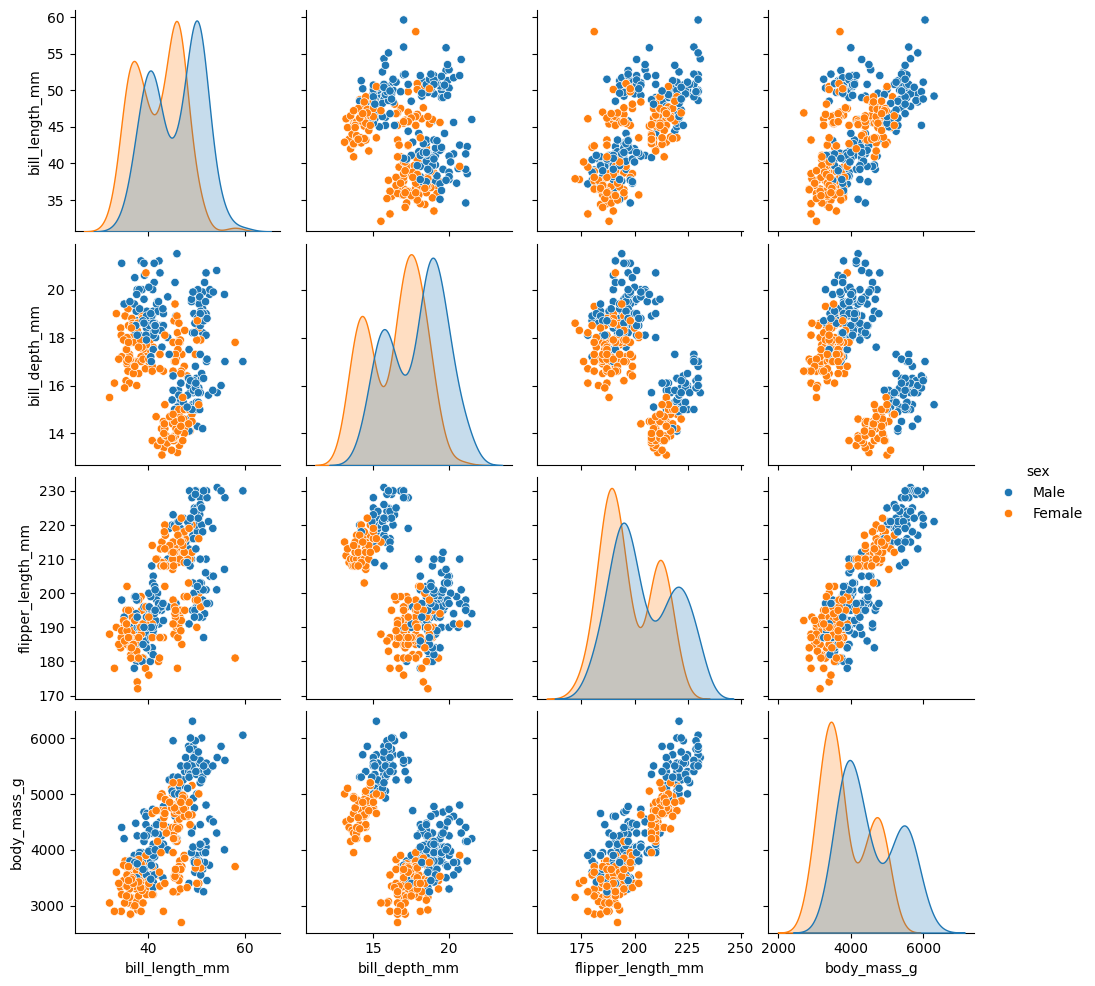

In [13]:
# Pairplot using sex as hue
# We see that two or three distinct groups are formed
# In some cases different species have some common measurements
# Looks like females have generally smaller values in all categories
# Based on this males are larger in size, weight, flipper and bill length and depth
sns.pairplot(df, hue='sex')

#### Scatterplot data for bill length and flipper length with different hue

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

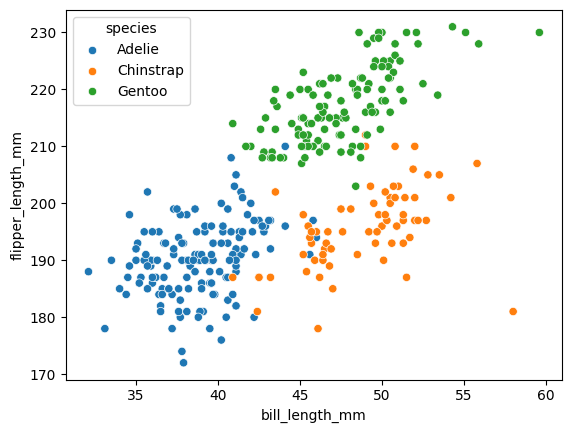

In [14]:
# Scatterplot data with species as hue
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=df)

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

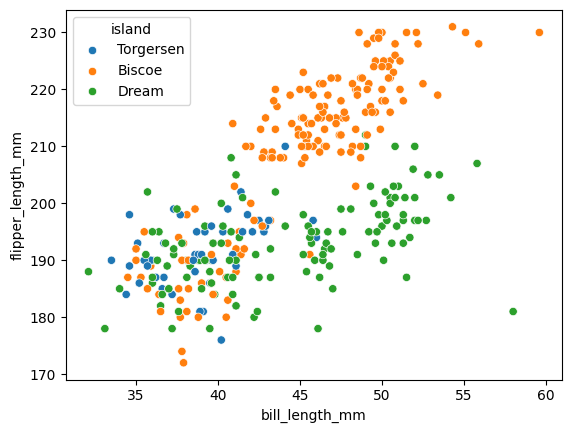

In [15]:
# Scatterplot data with island as hue
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='island', data=df)

We see now that species and islands form own groups, and also datapoint are almost identical.

At this point we can say that Gentoo has longest flipper and bill length and Adelie has smallest flipper and bill length. Chinstrap has medium size flipper and bill of these three species.

This same is also based on islands. Biscoe has longest flipper and bill length, but also smaller values. Torgersen island has only small values. Dream island has small and larger values, but not the largest values.

---

##### Boxplot data comparing species to flipper and bill length and bodymass, using island as hue

<Axes: xlabel='species', ylabel='flipper_length_mm'>

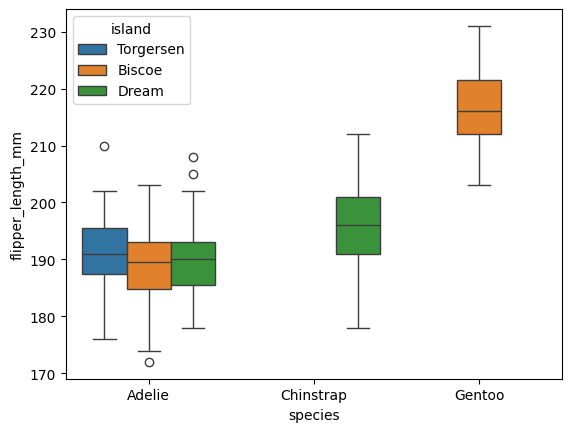

In [16]:
# Boxplot data with flipper length
sns.boxplot(x='species', y='flipper_length_mm', data=df, hue='island')

<Axes: xlabel='species', ylabel='bill_length_mm'>

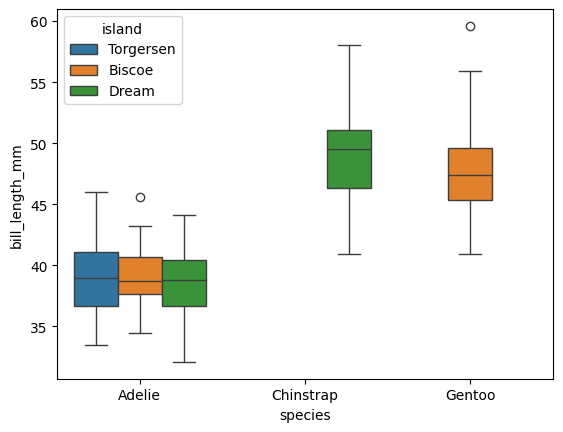

In [17]:
# Boxplot data with bill length
sns.boxplot(x='species', y='bill_length_mm', data=df, hue='island')

<Axes: xlabel='species', ylabel='body_mass_g'>

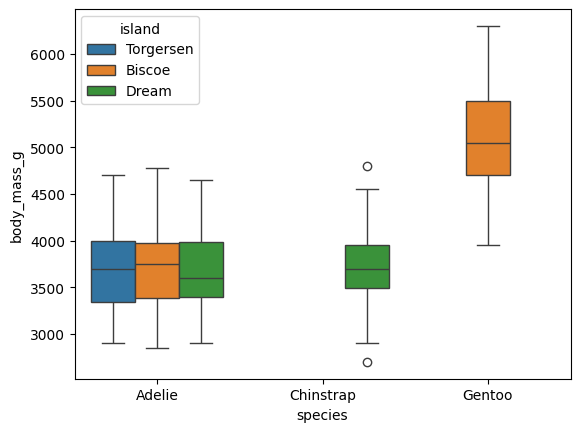

In [18]:
# Boxplot data with body mass
sns.boxplot(x='species', y='body_mass_g', data=df, hue='island')

#### Conclutions:
- Gentoo is the largest of all species and only lives in Biscoe island
    - Has largest body mass and flipper length
    - Bill length is same as Chingstrap
- Chinstrap lives only in Dream island and is same size as Adelie island population, but with more deviation in body mass
    - Bill length is large compared to body mass, same size or larger as Gentoo
    - Flipper length is almost same size as Adelie population
- Adelie lives in all three islands and has smallest body mass of all species
    - Also has smallest flipper and bill length
    - The only species to live in Torgersen island
    - Torgersen island population has surprisingly little deviation in measurements compared to other island populations even it is only (?) penguin species living in that island. Only flipper length is bit larger, this might mean that Torgersen island is harsh habitat and penguins need to swim longer distances to get food.
- As a biological case study this might be significant when comparing different populations of same species in different habitats.

---


<h4><b>2. Miles per gallon dataset from seaborn</b></h4>


In [19]:
# Load dataset 'mpg' from seaborn
df_mpg = sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


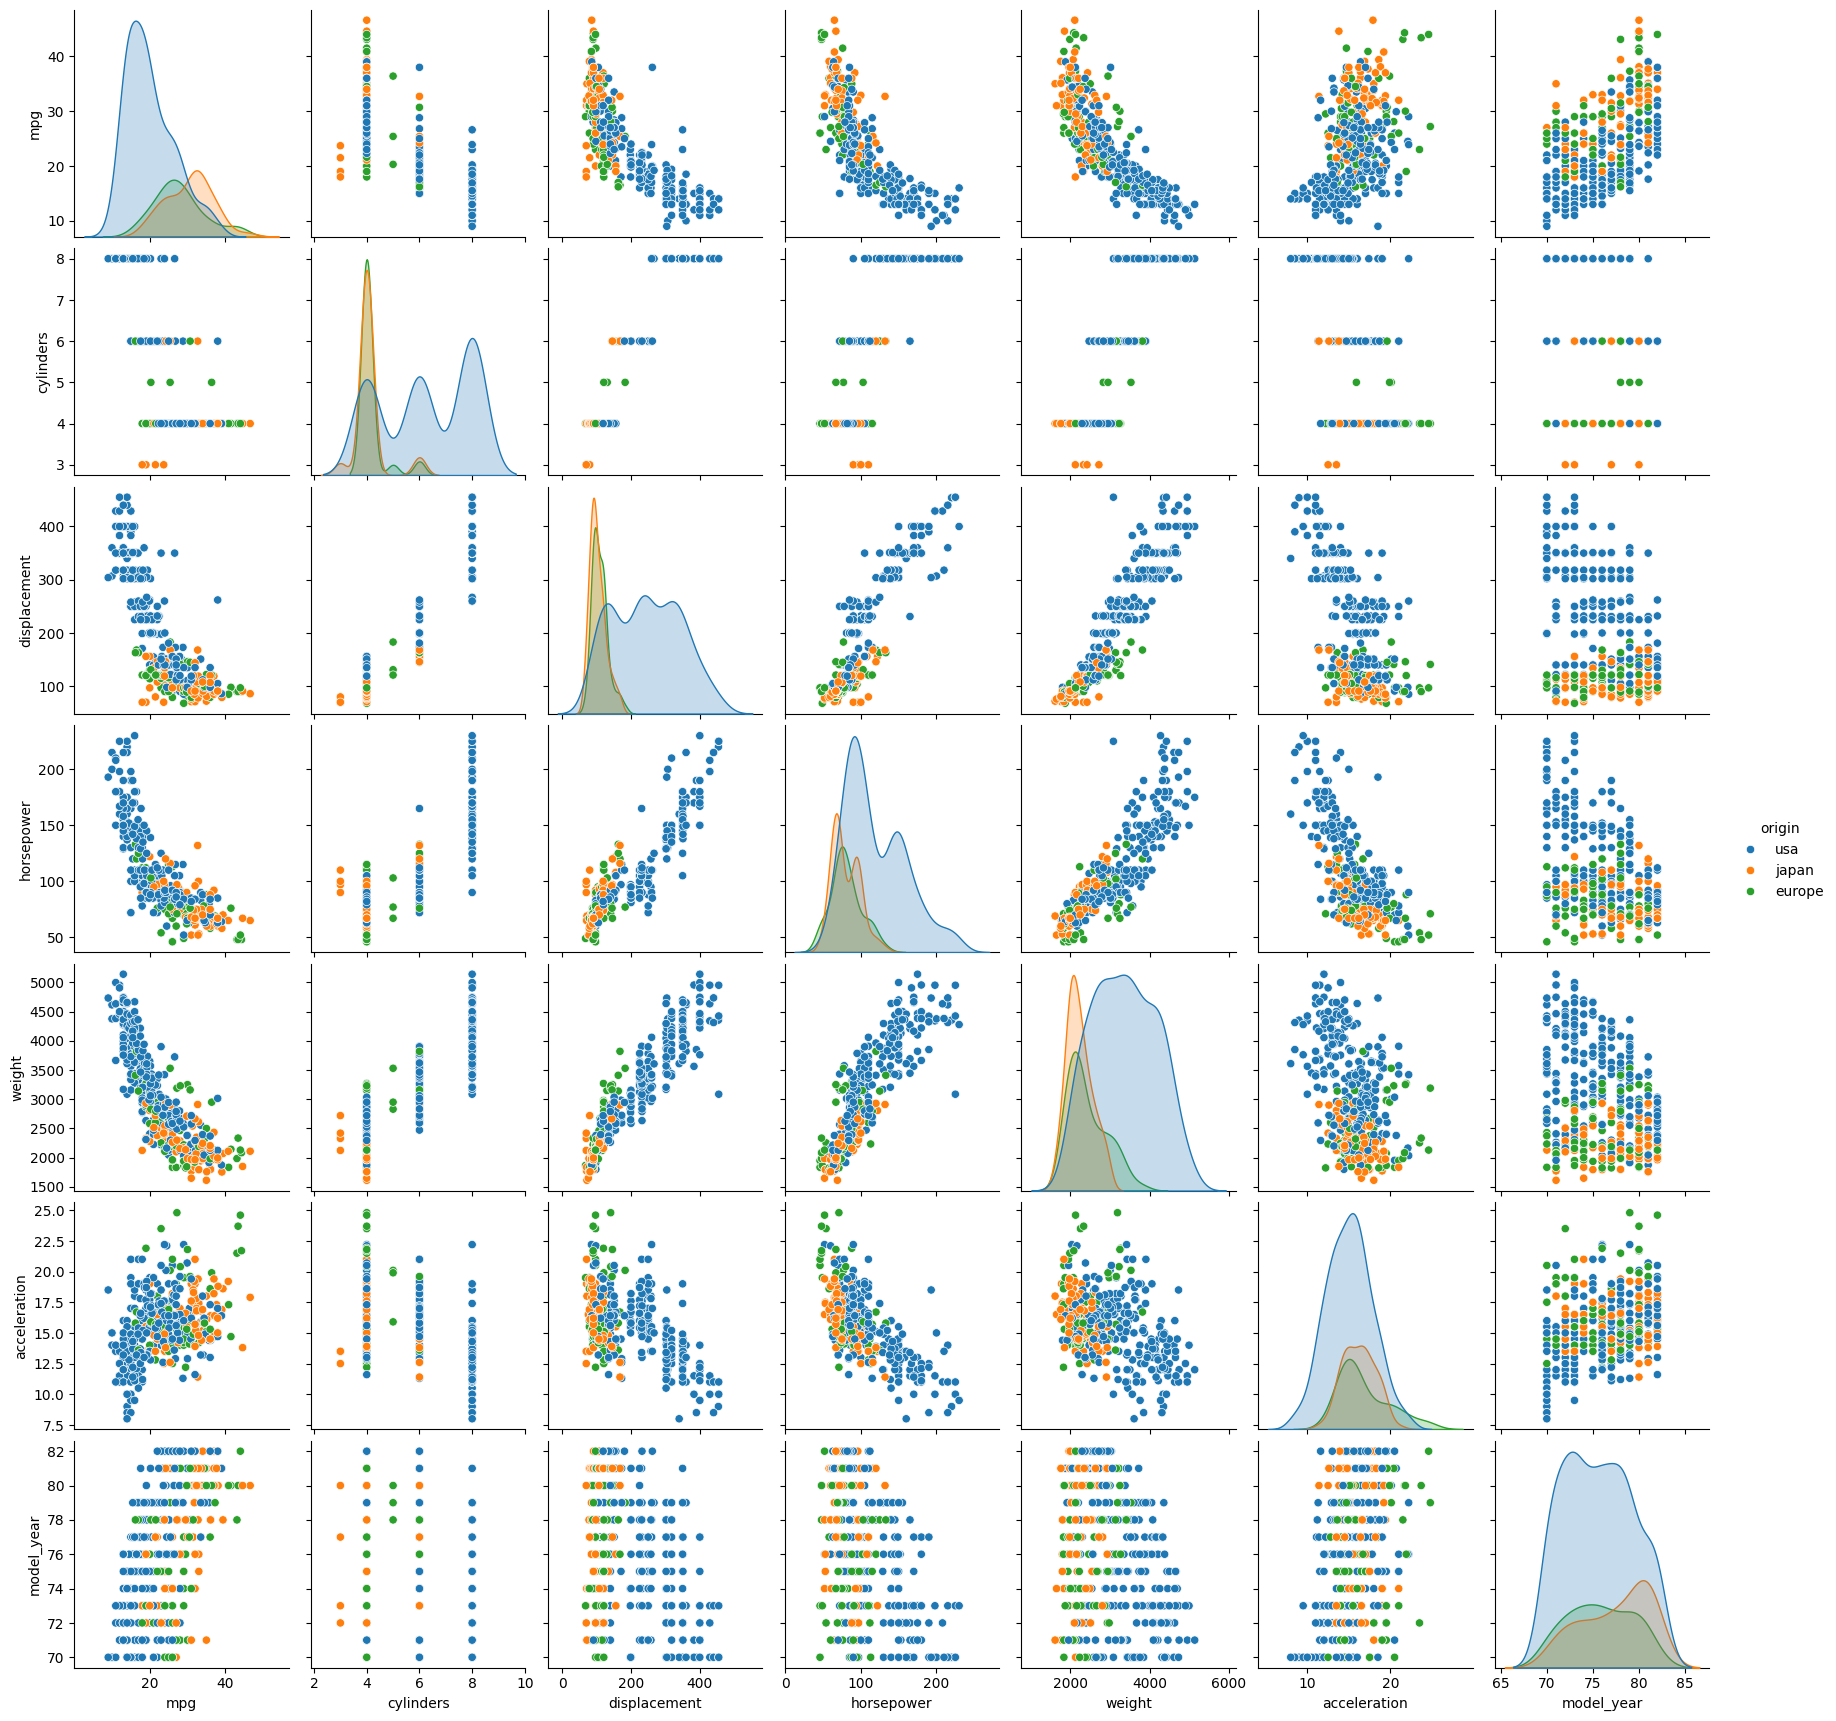

In [20]:
sns.pairplot(df_mpg, hue='origin')

In [21]:
# Create column litres per 100km: 'lp_100km'
# Conversion formula: 1 mail = 1.60934 km, 1 gallon = 3.78541 litres
# Consumption L / 100km = 100 / mpg * 1.60934 * 1 / 3.78541
df_mpg['lp_100km'] = round(100 / (df_mpg['mpg'] * 1.60934 * (1 / 3.78541)), 1)
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lp_100km
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,13.1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.7
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,13.1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,14.7
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,13.8
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,8.7
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,5.3
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,7.4
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,8.4


In [22]:
# Remove 'mpg' and 'name' columns
df_mpg = df_mpg.drop(['mpg', 'name'], axis=1)
df_mpg

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,lp_100km
0,8,307.0,130.0,3504,12.0,70,usa,13.1
1,8,350.0,165.0,3693,11.5,70,usa,15.7
2,8,318.0,150.0,3436,11.0,70,usa,13.1
3,8,304.0,150.0,3433,12.0,70,usa,14.7
4,8,302.0,140.0,3449,10.5,70,usa,13.8
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,8.7
394,4,97.0,52.0,2130,24.6,82,europe,5.3
395,4,135.0,84.0,2295,11.6,82,usa,7.4
396,4,120.0,79.0,2625,18.6,82,usa,8.4


#### Create corralation matrix and remove unnecessarry columns

In [23]:
# Check correlations
# We should remove 'acceleration' and 'cylinders' columns, because
# Accelaration is combination of horsepower and weight ration, and is more indirect than physical measurements. And has smallest negative correlation.
# Cylinders though are accurate physical feature, but are included in displacement feature all together. And it has smallest positive correlation.
# Model year gives more info about car production
cor = df_mpg.corr(numeric_only=True)
cor

,cylinders,displacement,horsepower,weight,acceleration,model_year,lp_100km
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,0.839543
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.866774
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.854688
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.885252
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,-0.455994
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,-0.557396
lp_100km,0.839543,0.866774,0.854688,0.885252,-0.455994,-0.557396,1.000000


In [24]:
# Remove 'acceleration' and 'cylinders' columns
df_mpg = df_mpg.drop(['acceleration', 'cylinders'], axis=1)
df_mpg

,displacement,horsepower,weight,model_year,origin,lp_100km
0,307.0,130.0,3504,70,usa,13.1
1,350.0,165.0,3693,70,usa,15.7
2,318.0,150.0,3436,70,usa,13.1
3,304.0,150.0,3433,70,usa,14.7
4,302.0,140.0,3449,70,usa,13.8
...,...,...,...,...,...,...
393,140.0,86.0,2790,82,usa,8.7
394,97.0,52.0,2130,82,europe,5.3
395,135.0,84.0,2295,82,usa,7.4
396,120.0,79.0,2625,82,usa,8.4


In [25]:
# Check correlations again
cor = df_mpg.corr(numeric_only=True)
cor

,displacement,horsepower,weight,model_year,lp_100km
displacement,1.000000,0.897257,0.932824,-0.370164,0.866774
horsepower,0.897257,1.000000,0.864538,-0.416361,0.854688
weight,0.932824,0.864538,1.000000,-0.306564,0.885252
model_year,-0.370164,-0.416361,-0.306564,1.000000,-0.557396
lp_100km,0.866774,0.854688,0.885252,-0.557396,1.000000


<Axes: >

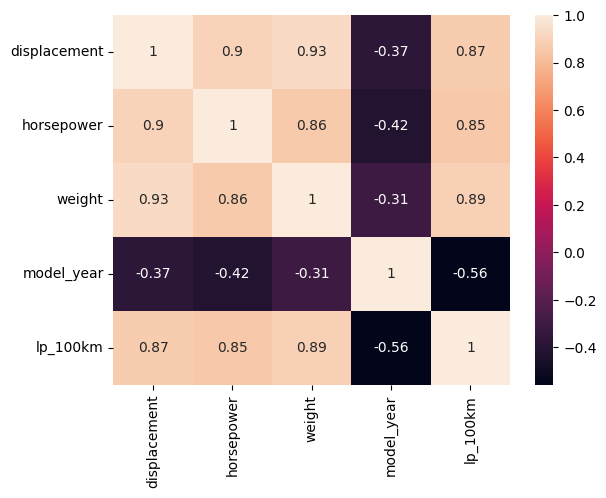

In [26]:
# Create heatmap
sns.heatmap(data=cor, annot=True)

#### Select one column to represent car efficiency and drop others

In [27]:
# Select one column for representative
# Looks like 'displacement' would be best candidate
# Because it is combination of motor power
# Horsepower (brake horsepower bhp) column has little bit lower correlation and techically is combination of motor and transmission --> more indirect
# Weight column has almost equal correlations and is strongly connected to displacement (0.93 correlation).
# Looks like more heavier cars have more powerful/effective motor and hence you could say they go hand in hand.
# Weight itself is combination of many things not direct measurement of car efficiency or performance
# But lighter cars can have larger motors and thereby consume more fuel.
# Also displacement is a motor feature and hence measurement of efficiency
df_mpg = df_mpg.drop(['horsepower', 'weight'], axis=1)
df_mpg

,displacement,model_year,origin,lp_100km
0,307.0,70,usa,13.1
1,350.0,70,usa,15.7
2,318.0,70,usa,13.1
3,304.0,70,usa,14.7
4,302.0,70,usa,13.8
...,...,...,...,...
393,140.0,82,usa,8.7
394,97.0,82,europe,5.3
395,135.0,82,usa,7.4
396,120.0,82,usa,8.4


#### Pairplot data using origin as hue

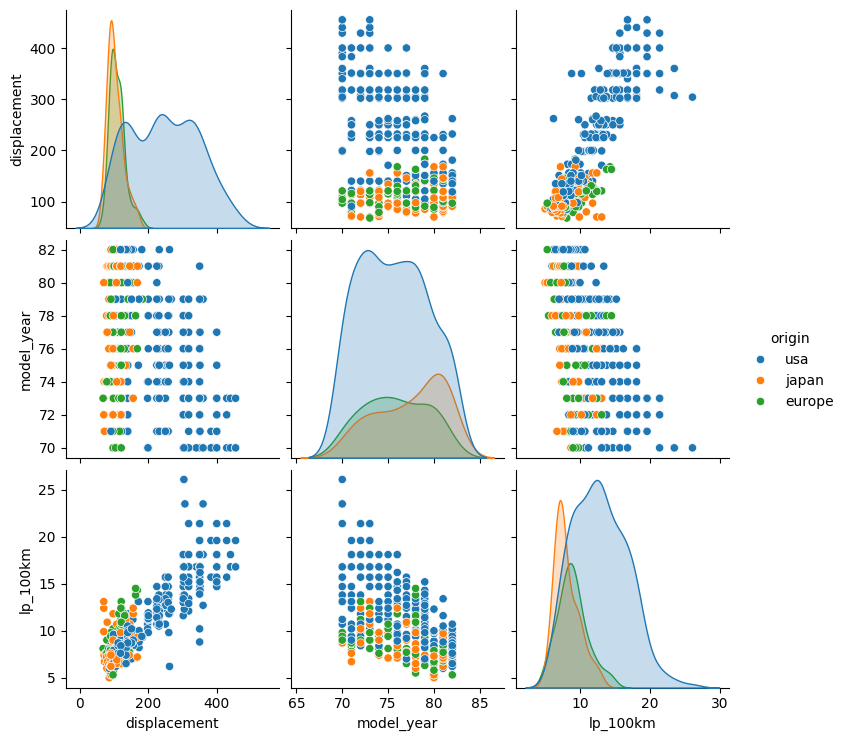

In [28]:
# Pairplot data using origin as hue
# Usa made cars have bigest fuel consumption.
# Looks like japanise cars have lowest fuel consumption. We nee more analysis to be accurate.
# Model year has some correlation but large variance. 
sns.pairplot(data=df_mpg, hue='origin')

<Axes: xlabel='origin', ylabel='displacement'>

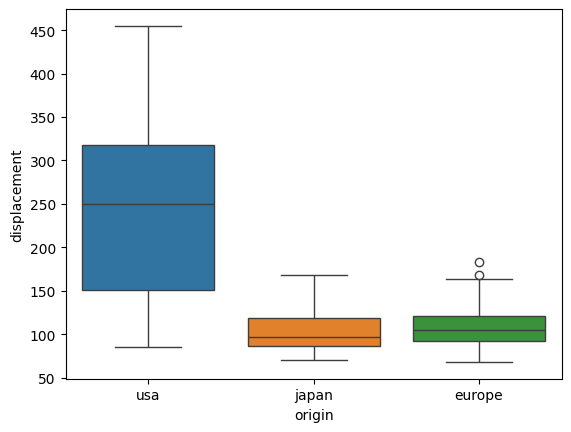

In [29]:
# This picture shows how this data works.
# USA made cars have by far the biggest displacement but also largest variance.
# European and Japanise cars have smaller displacement and less variance.
sns.boxplot(x='origin', y='displacement', data=df_mpg, hue='origin')

<Axes: xlabel='origin', ylabel='lp_100km'>

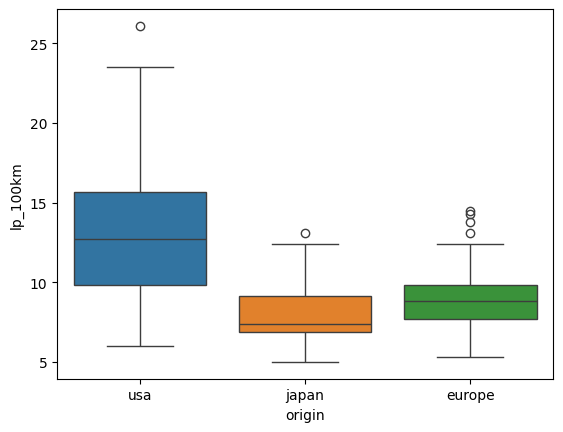

In [30]:
# USA cars have largest fuel consumption
# Japanise cars have smallest full consumption and motor power - fuel consumption ratio is little bit better than in European cars.
sns.boxplot(x='origin', y='lp_100km', data=df_mpg, hue='origin')

---

<h4><b>3. csv-data, pandas and seaborn, groceries data</b></h4>


<p>
This dataset has been downloaded from <b><i>kaggle.com</i></b>.<br />
Download the "groceries.csv" from Moodle.
<br /><br />
Load the data by using pandas. (read_csv() etc.)
<br /><br />

<b>Note:</b> since this is an actual dataset from the internet, the data is in quite a rough format.

</p>

<li>If you take a look at the data, you will notice three columns have NaN –
values. You can either remove these columns all together, or you can fill
the missing values with average values of that column. For example, for
the Fish -column you could do something like this:<br /><br />

<b>df['Fish'].fillna((df['Fish'].mean()), inplace=True)</b><br /><br />
In this case, food is the name of the DataFrame we just got from the csv-file. Do this same operation to the two other columns with missing
values.</li>

In [31]:
# handle incomplete rows here, justify your approach on how you handled them

<ul>
<li>In this data, the date column is a bit difficult to use, since it's not
completely in numerical format. Split the Month-column so, that you
have two different columns: Month and Year</li>
<ul>
<li>For month, use a numeric format 1-12</li>
<li>For year, use the full year 1990-2020</li>
<li>Check out the examples in Moodle, this one is a bit tricky, but
very neat to know how it's done!</li>
</ul>
</ul>

In [32]:
# code here

<li>After the cleanups, create a correlation matrix of the data. Create a heatmap on the correlations as well.
<br /><br />
<span style="color: red; font-weight: bold;">Which grocery stands out?</span> (i.e. there seems to be one grocery item
whose price doesn't follow other groceries at all)
</li>

In [33]:
# code here

<li style="color: red; font-weight: bold;">Which groceries seem to correlate to each other's prices? What do they have in common?</li>

In [34]:
# code here

<b>Bonus task:</b>
<p>Sometimes data can also reflect history! For example, "Corn" and some
other foods seem to have a notable peak in its price in one of the years.
Find this year, and Google if you can find a reason for the price peak (for
example, search: "us corn expensive XXXX". <span style="color: red; font-weight: bold;">Can you find any other food
that has relation to a real world event in a similar in this dataset?</span></p>
<p><b>Tip:</b> use pivot table and heatmap! Remember also, the first year in the
dataset might show as blank white, that means there's no data. You
should also split the date</p>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/food.png" />


<h4><b>4. csv-data, pandas and seaborn, mobile phone data, regression plots</b></h4>


<p>This dataset has been downloaded from <b><i>kaggle.com</i></b> and modified. <br />
Download the "mobilephones.csv" from Moodle.  Load the data by using pandas.  (read_csv() etc.)</p>

<p>
Regression plots (<b>lmplot()</b> in seaborn) are often extremely useful in finding more insight and "hidden connections" in your data. </p>

<p>
Remember to also check out the confidence interval, if it's wide around the regression line = there's usually fluctuation within the values. <br />Narrow line => the linear connection is quite evident.</p>


<b>With the mobile phone data, do the following:</b>

<ul>

<li>Use regression plot for RAM and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>



</ul>

In [35]:
# code here

<ul>
<li>Use regression plot for RAM and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

In [36]:
# code here

<ul>
<li>Use regression plot for BatteryCapacity and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>


</ul>

In [37]:
# code here

<ul>
<li>Use regression plot for BatteryCapacity and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

In [38]:
# code here

<ul>
<li><b>Bonus task:</b> Use regression plot for ScreenSize and Price, without and with hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">Compare the correlations with and without hue. Is there a difference?</li>
</ul>
</ul>

In [39]:
# optional bonus task code here

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mobilephone.png" />


<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li>1. <b>seaborn:</b> Try out Boxenplot and/or Dendrogram in any of the previous
dataset exercises. Do these plot types provide some interesting info on
the data? (Google for examples on these plot types)</li>
<ul>
<li>You may also consider some other plots, for example:
<b>displot, catplot, relplot</b></li>
</ul>
</ul>

In [40]:
# code for the advanced extra task

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/titanic.png"/>

In [41]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/taxis.png"/>


In [42]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

In [43]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [44]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding